# ▶ 이커머스 데이터 분석 팀 PJT
**지표 현황 분석 및 RFM 기반 고객 세분화**
- 기간: 2024.12.30 ~ 2025.01.20
- 데이터셋 출처 링크: [DACON](https://dacon.io/competitions/official/236222/data)

#### Data Description
**Onlinesales_info.csv**
- 온라인거래와 관련된 정보
- 고객ID : 고객 고유 ID
- 거래ID : 거래 고유 ID
- 거래날짜 : 거래가 이루어진 날짜
- 제품ID : 제품 고유 ID
- 제품카테고리 : 제품이 포함된 카테고리
- 수량 : 주문한 품목 수
- 평균금액 : 수량 1개당 가격 (단위 : 달러)
 -동일 상품이어도 세부 옵션에 따라 가격이 다를 수 있음
- 배송료 : 배송비용 (단위 : 달러)
- 쿠폰상태 : 할인쿠폰 적용 상태

**Customer_info.csv**
- 고객과 관련된 정보
- 고객ID : 고객 고유 ID
- 성별 : 고객 성별
- 고객지역 : 고객지역
- 가입기간 : 가입기간 (단위 : 월)

**Discount_info.csv**
- 할인과 관련된 정보
- 월 : 월(Month) 정보
- 제품카테고리 : 제품이 포함된 카테고리
- 쿠폰코드 : 쿠폰코드
- 할인율 : 해당 쿠폰에 대한 할인율(%)

**Marketing_info.csv**
- 마케팅비용과 관련된 정보
- 날짜 : 마케팅이 이루어진 날짜
- 오프라인비용 : 오프라인 마케팅으로 지출한 비용 (단위 : 달러)
- 온라인비용 : 온라인 마케팅으로 지출한 비용 (단위 : 달러)

**Tax_info.csv**
- 세금과 관련된 정보
- 제품 카테고리 : 제품이 포함된 카테고리
- GST : Goods and Services Tax(%)

#### Setup

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

# set style
plt.style.use('seaborn-whitegrid')  # Notebook
# plt.style.use('seaborn-v0_8-whitegrid') # Desktop
sns.set_theme(style="whitegrid", palette="pastel")  # Seaborn 스타일 설정

# Matplotlib 설정
plt.rcParams['figure.figsize'] = (10, 5)  # 기본 그래프 크기
plt.rcParams['font.size'] = 12  # 기본 폰트 크기
plt.rcParams['axes.titlesize'] = 15  # 제목 폰트 크기
plt.rcParams['axes.labelsize'] = 12  # 축 레이블 크기
plt.rcParams['xtick.labelsize'] = 10  # x축 틱 크기
plt.rcParams['ytick.labelsize'] = 10  # y축 틱 크기
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 한글 폰트 설정 (한글 데이터 포함 시)
import platform
if platform.system() == "Windows":
    plt.rcParams['font.family'] = 'Malgun Gothic'

# Seaborn 추가 설정
sns.set_context("notebook", font_scale=1.2)  # Seaborn 폰트 크기 조정
sns.set_palette("Set2")  # 기본 색상 팔레트 설정

## 탐색적 데이터 분석 EDA

**EDA 목표 설정**
- 분석 방향 설정 및 분석 프로젝트 기획안 작성을 위한 EDA 진행
- 특히, 데이터 이해도를 높이기 위한 꼼꼼하고 세부적인 EDA 진행

> 데이터셋 불러오기

In [ ]:
customer = pd.read_csv('raw/Customer_info.csv') # 고객 정보
discount = pd.read_csv('raw/Discount_info.csv') # 할인 정보
marketing = pd.read_csv('raw/Marketing_info.csv') # 마케팅 정보
onlinesales = pd.read_csv('raw/Onlinesales_info.csv') # 온라인거래 정보
tax = pd.read_csv('raw/Tax_info.csv') # 세금 정보

- 온라인 거래 정보 데이터셋을 Main 으로 쓰는게 효율적일 것으로 보임

> onlinesales 온라인 거래 정보

In [3]:
print(f'Data shape: {onlinesales.shape}')
display(onlinesales.head())

Data shape: (52924, 9)


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [4]:
onlinesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


- 결측치(Null, NaN)는 없는 것으로 확인됨
- 거래날짜 object → date 변환 필요해 보임

In [5]:
# 수치형 변수 기초통계량 확인
onlinesales.drop(columns='거래날짜').describe().round(2)

,수량,평균금액,배송료
count,52924.0,52924.00,52924.00
mean,4.5,52.24,10.52
std,20.1,64.01,19.48
min,1.0,0.39,0.00
25%,1.0,5.70,6.00
50%,1.0,16.99,6.00
75%,2.0,102.13,6.50
max,900.0,355.74,521.36


- 최소 수량과 최대 수량의 편차가 매우 큼
- 배송료의 최소값이 0인 경우 무료 배송이 포함되어 있을 것이라 추측

In [6]:
# 중복 데이터 확인
print(f'중복 데이터 수: {onlinesales.duplicated().sum()}')

중복 데이터 수: 0


In [8]:
# 고객 쿠폰 사용 현황 확인
pd.concat([onlinesales.쿠폰상태.value_counts(), onlinesales.쿠폰상태.value_counts(normalize=True).round(2)], axis=1)

,쿠폰상태,쿠폰상태
Clicked,26926,0.51
Used,17904,0.34
Not Used,8094,0.15


In [ ]:
# 1년의 모든 날짜가 포함되어 있는지 확인
onlinesales.거래날짜.nunique()

365

> customer 고객 정보

In [ ]:
display(customer.head())

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [ ]:
# 중복 고객 여부 확인
print(f'중복 데이터 수: {customer.duplicated().sum()}')

중복 데이터 수: 0


In [ ]:
# 고유 고객 정보 재확인
print(f'Data shape : {customer.shape}')
print('Unique Customers: ', customer[customer.columns[0]].nunique())

Data shape : (1468, 4)
Unique Customers:  1468


In [ ]:
# 가입기간 분포 확인
customer.describe().round(2)

,가입기간
count,1468.00
mean,25.91
std,13.96
min,2.00
25%,14.00
50%,26.00
75%,38.00
max,50.00


- 온라인 거래 정보 데이터(onlinesales) 기준으로 Left join 가능해 보임(key : 고객 ID)

> discount 할인 정보

In [ ]:
print(f'Data shape: {discount.shape}')
display(discount.head())

Data shape: (204, 4)


,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
print(f'중복 데이터 수: {discount.duplicated().sum()}')

중복 데이터 수: 0


In [ ]:
print('Unique Coupons: ', discount['쿠폰코드'].nunique())

Unique Coupons:  48


In [ ]:
discount['할인율'].describe().round()

,할인율
count,204.0
mean,20.0
std,8.0
min,10.0
25%,10.0
50%,20.0
75%,30.0
max,30.0


- 쿠폰은 총 48 종류(중복X)
- 할인율 최소 10% ~ 최대 30%

> marketing 마케팅 정보

- 거래일 별 마케팅 비용

In [ ]:
print(f'Data shape: {marketing.shape}')
display(marketing.head())

Data shape: (365, 3)


,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


- 날짜 object → date 변환 필요해 보임

In [ ]:
print(f'중복 데이터 수: {marketing.duplicated().sum()}')

중복 데이터 수: 0


In [ ]:
# 모든 날짜가 포함되어있는지 확인
print(marketing['날짜'].nunique())

365


In [ ]:
# 마케팅비용 분포 확인
marketing.drop(columns='날짜').describe().round(2)

,오프라인비용,온라인비용
count,365.00,365.00
mean,2843.56,1905.88
std,952.29,808.86
min,500.00,320.25
25%,2500.00,1258.60
50%,3000.00,1881.94
75%,3500.00,2435.12
max,5000.00,4556.93


> tax 세금 정보

In [ ]:
print(f'Data shape : {tax.shape}')
display(tax.head())

Data shape : (20, 2)


,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [ ]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [ ]:
print(f'중복 데이터 수: {tax.duplicated().sum()}')

중복 데이터 수: 0


In [9]:
print(onlinesales['제품카테고리'].unique())
print(tax['제품카테고리'].unique())

['Nest-USA' 'Office' 'Apparel' 'Bags' 'Drinkware' 'Lifestyle'
 'Notebooks & Journals' 'Headgear' 'Waze' 'Fun' 'Nest-Canada' 'Backpacks'
 'Google' 'Bottles' 'Gift Cards' 'More Bags' 'Housewares' 'Android'
 'Accessories' 'Nest']
['Nest-USA' 'Office' 'Apparel' 'Bags' 'Drinkware' 'Lifestyle'
 'Notebooks & Journals' 'Headgear' 'Waze' 'Fun' 'Nest-Canada' 'Backpacks'
 'Google' 'Bottles' 'Gift Cards' 'More Bags' 'Housewares' 'Android'
 'Accessories' 'Nest']


In [ ]:
# 제품 카테고리 고유값 확인
print(onlinesales['제품카테고리'].nunique())
print(tax['제품카테고리'].nunique())

20
20


- 모든 제품카테고리에 대해서 세금이 포함되어있음
- 온라인 거래 정보 데이터(Onlinesales) 기준으로 Left join 가능해 보임 (key: 제품카테고리)

### Data Preprocessing

> 온라인거래 정보 기준 데이터 병합 및 전처리

**파생 변수 정의**
- 총 금액 : 수량 * 평균금액
- 할인적용금액 : 총 금액 * 할인율 - 쿠폰상태가 Used 인 이력에 한해서
- 총 지불금액 : 할인적용금액 * (1+GST) + 배송료

In [3]:
# dtypes : object -> datetime
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])
marketing['날짜'] = pd.to_datetime(marketing['날짜'])
marketing['월'] = marketing['날짜'].dt.month

# 총 금액 : 수량 * 평균금액
onlinesales['총 금액'] = onlinesales['수량'] * onlinesales['평균금액']

# 거래 월(이름) 생성
onlinesales['거래월'] = onlinesales['거래날짜'].dt.month_name().str[:3]

# 온라인거래 정보 기준으로 고객, 할인, 세금 정보 병합
onlinesales = pd.merge(onlinesales, customer, how='left', on='고객ID')
onlinesales = pd.merge(onlinesales, discount, how='left', left_on=['제품카테고리', '거래월'], right_on=['제품카테고리', '월'])
onlinesales = onlinesales.drop(columns='월')
onlinesales = pd.merge(onlinesales, tax, how='left', on='제품카테고리')

# 결측값 치환
onlinesales['쿠폰코드'] = onlinesales['쿠폰코드'].fillna('none')
onlinesales['할인율'] = onlinesales['할인율'].fillna(0)

# 할인적용금액 : 총 금액 * (1 - 할인율 / 100) - 쿠폰상태 == 'Used' 인 거래에 한 해서
onlinesales['할인적용금액'] = onlinesales.apply(lambda x: x['총 금액'] * (1 - x['할인율'] / 100) if x['쿠폰상태'] == 'Used' else x['수량'] * x['평균금액'], axis=1)

# 총 지불금액 : 할인적용금액 * (1+GST) + 배송료
onlinesales['총 지불금액'] = onlinesales['할인적용금액'] * (1 + onlinesales['GST']) + onlinesales['배송료']

In [4]:
onlinesales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총 금액,거래월,성별,고객지역,가입기간,쿠폰코드,할인율,GST,할인적용금액,총 지불금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,Jan,남,Chicago,12,ELEC10,10.0,0.10,138.339,158.67290
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,Jan,남,Chicago,12,ELEC10,10.0,0.10,138.339,158.67290
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05,Jan,남,Chicago,12,OFF10,10.0,0.10,1.845,8.52950
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65,Jan,남,Chicago,12,SALE10,10.0,0.18,87.650,109.92700
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50,Jan,남,Chicago,12,AIO10,10.0,0.18,14.850,24.02300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30,Dec,여,New York,45,ELEC30,30.0,0.10,121.300,139.93000
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92,Dec,여,New York,45,SALE30,30.0,0.18,34.244,46.90792
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88,Dec,여,New York,45,ELEC30,30.0,0.10,106.316,123.44760
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60,Dec,여,California,7,ELEC30,30.0,0.10,402.600,449.36000


In [ ]:
data = onlinesales.groupby('고객ID').agg({'총 지불금액': 'sum', '거래ID': 'nunique'}).rename(columns={'거래ID': '구매횟수'})
data['APV'] = data['총 지불금액']/data['구매횟수']


고객ID
USER_0000    174.981740
USER_0001    506.027225
USER_0002    211.194492
USER_0003    133.403207
USER_0004    154.417615
                ...    
USER_1463    286.895333
USER_1464    158.765459
USER_1465     83.453750
USER_1466    333.800000
USER_1467    138.808517
Length: 1468, dtype: float64

In [11]:
# 결측치 여부 확인
onlinesales.isnull().sum()

고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
총 금액      0
거래월       0
성별        0
고객지역      0
가입기간      0
쿠폰코드      0
할인율       0
GST       0
할인적용금액    0
총 지불금액    0
dtype: int64

In [ ]:
onlinesales[onlinesales['쿠폰코드'] == 'none']['제품카테고리'].unique()

array(['Fun', 'Backpacks', 'Google', 'More Bags'], dtype=object)

In [ ]:
discount[discount['제품카테고리'].isin(['Fun', 'Backpacks', 'Google', 'More Bags'])]

,월,제품카테고리,쿠폰코드,할인율


- 'Fun', 'Backpacks', 'Google', 'More Bags' 카테고리에 대해선 특정 쿠폰 할인이 적용되지 않습니다.
  - Null값인 쿠폰코드를 none, 할인율을 0으로 치환

In [ ]:
print(f'중복 데이터 수: {onlinesales.duplicated().sum()}')

중복 데이터 수: 0


In [ ]:
print(f'Data Shape: {onlinesales.shape[0]:,} rows, {onlinesales.shape[1]} cols')

Data Shape: 52,924 rows, 19 cols


### Correlation Matrix

In [ ]:
onlinesales[['수량', '평균금액', '배송료', '가입기간', '할인율', 'GST']].corr().style.background_gradient(cmap='coolwarm_r', vmin=-1, vmax=1).format('{:.2f}')

,수량,평균금액,배송료,가입기간,할인율,GST
수량,1.00,-0.11,0.19,0.01,-0.01,-0.03
평균금액,-0.11,1.00,-0.11,-0.00,0.03,-0.58
배송료,0.19,-0.11,1.00,-0.01,-0.02,0.03
가입기간,0.01,-0.00,-0.01,1.00,0.03,-0.00
할인율,-0.01,0.03,-0.02,0.03,1.00,-0.01
GST,-0.03,-0.58,0.03,-0.00,-0.01,1.00


### 지표 현황 파악

> 고객 수, 거래 건 수, 거래 금액, 주문 수량

In [5]:
print(f'총 거래 건 수: {len(onlinesales):,} 건')
print(f'총 고객 수: {onlinesales.고객ID.nunique():,} 명')
print(f'고객 당 평균 거래 건 수: {round(len(onlinesales)/onlinesales.고객ID.nunique())} 건\n')
print('총 거래액: ', '{:,}'.format(onlinesales['총 지불금액'].sum().round(2)), '달러')
print('평균 거래 금액: ', round(onlinesales['총 지불금액'].mean(), 2), '달러', '\n')
print(f'총 주문 수량: {onlinesales.수량.sum():,} 개')
print(f'평균 주문 수량: {onlinesales.수량.mean():.1f} 개')

총 거래 건 수: 52,924 건
총 고객 수: 1,468 명
고객 당 평균 거래 건 수: 36 건

총 거래액:  5,397,358.75 달러
평균 거래 금액:  101.98 달러 

총 주문 수량: 238,033 개
평균 주문 수량: 4.5 개


### 매출 및 거래 건 수

> 거래 날짜별 시계열 드릴다운 분석

In [ ]:
onlinesales.groupby('거래날짜').agg({'총 지불금액': 'sum', '거래ID': 'count'})

,총 지불금액,거래ID
거래날짜,,
2019-01-01,9039.42048,89
2019-01-02,15269.39436,115
2019-01-03,29145.65155,207
2019-01-04,19500.23722,169
2019-01-05,21260.25480,189
...,...,...
2019-12-27,14371.81383,103
2019-12-28,11192.15088,80
2019-12-29,12299.47787,89


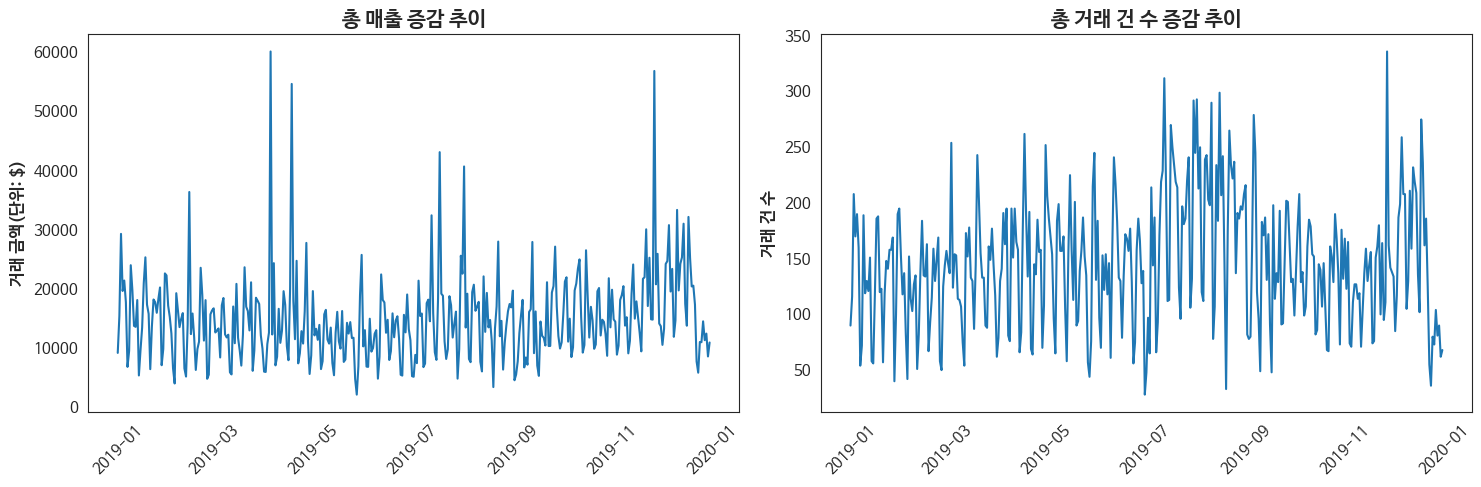

In [6]:
data = onlinesales.groupby('거래날짜').agg({'총 지불금액': 'sum', '거래ID': 'count'})

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(data.index, data['총 지불금액'])
# axes[0].axhline(y=data['총 금액'].mean(), color='black', linestyle='--') # 수평선 : 평균
axes[0].set_title('총 매출 증감 추이', fontsize=15, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('')
axes[0].set_ylabel('거래 금액(단위: $)', fontsize=12, fontweight='bold')

axes[1].plot(data.index, data['거래ID'])
# axes[1].axhline(y=data['거래ID'].mean(), color='black', linestyle='--') # 수평선 : 평균
axes[1].set_title('총 거래 건 수 증감 추이', fontsize=15, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('')
axes[1].set_ylabel('거래 건 수', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

- 4월, 7월, 11월 구간에서 높은 거래 금액이 발생했으며, 거래 건 수 또한 같은 구간에서 유사한 특징이 보임
- 분기, 월, 요일별로 드롭다운하여 추가 분석 진행

> 분기별

In [14]:
onlinesales.groupby(onlinesales['거래날짜'].dt.quarter).agg({'총 지불금액': 'sum', '거래ID': 'count'})

,총 지불금액,거래ID
거래날짜,,
1,1.284410e+06,11693
2,1.204095e+06,12915
3,1.324186e+06,15689
4,1.584668e+06,12627


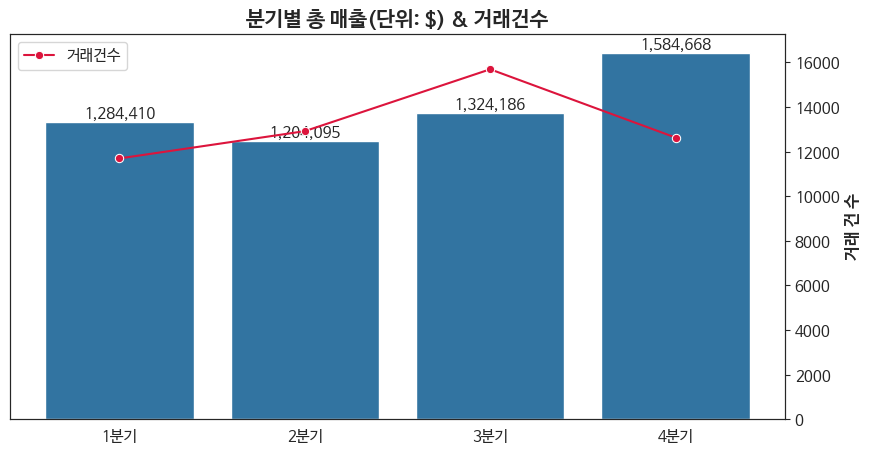

In [7]:
data = onlinesales.groupby(onlinesales['거래날짜'].dt.quarter).agg({'총 지불금액': 'sum', '거래ID': 'count'})
data.index = ['1분기', '2분기', '3분기', '4분기']

fig, ax1 = plt.subplots(figsize=(10, 5))
# 총 지불금액
sns.barplot(x=data.index, y=data['총 지불금액'], ax=ax1)
# 데이터 라벨 표시
for i, count in enumerate(data['총 지불금액']):
    ax1.text(i, count, f'{count:,.0f}', ha='center', va='bottom')
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.set_xlabel('')

ax2 = ax1.twinx()
# 거래 건 수
sns.lineplot(x=data.index, y=data['거래ID'], ax=ax2, color='crimson', marker='o', label='거래건수')

ax2.set_ylabel('거래 건 수', fontsize=12, fontweight='bold')
ax2.set_ylim(0, data['거래ID'].max() * 1.1)
ax2.legend(loc='upper left')

plt.title('분기별 총 매출(단위: $) & 거래건수', fontsize=15, fontweight='bold')
plt.show()

> 월별

In [13]:
onlinesales.groupby(onlinesales['거래날짜'].dt.month).agg({'총 지불금액': 'sum', '거래ID': 'count'})

,총 지불금액,거래ID
거래날짜,,
1,494090.54875,4063
2,375162.04730,3284
3,415157.79044,4346
4,477498.59102,4150
5,365596.02956,4572
6,361000.17429,4193
7,451878.40904,5251
8,475796.87554,6150
9,396510.49254,4288


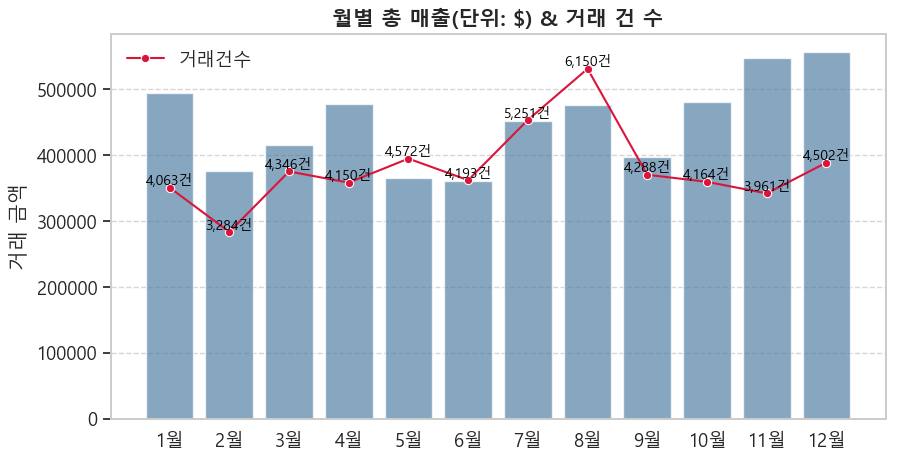

In [33]:
data = onlinesales.groupby(onlinesales['거래날짜'].dt.month).agg({'총 지불금액': 'sum', '거래ID': 'count'})
data.index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

# 이중축 그래프
fig, ax1 = plt.subplots(figsize=(10, 5))
# 총 지불금액
sns.barplot(x=data.index, y=data['총 지불금액'], ax=ax1, color='steelblue', alpha=0.7)
ax1.set_ylabel('거래 금액')
ax1.set_xlabel('')
ax1.grid(True, axis='y', linestyle='--', alpha=0.8)

# 거래 건 수
ax2 = ax1.twinx()
sns.lineplot(x=data.index, y=data['거래ID'], ax=ax2, color='crimson', marker='o', label='거래건수')
# 데이터 레이블 표시
for i in range(len(data)):
    ax2.text(i, data['거래ID'][i], f'{data["거래ID"][i]:,.0f}건', ha='center', va='bottom', fontsize=10, color='black')
ax2.set_ylabel('거래 건 수', fontsize=12, fontweight='bold')
ax2.set_ylim(0, data['거래ID'].max() * 1.1)
ax2.set_ylabel('')
ax2.set_yticks([])
ax2.legend(loc='upper left')

plt.title('월별 총 매출(단위: $) & 거래 건 수', fontsize=15, fontweight='bold')
plt.show()

- 공통적으로 4분기인 11월, 12월의 매출이 가장 높게 발생했으며, 3분기인 7월, 8월의 거래 건 수가 가장 많게 나타남

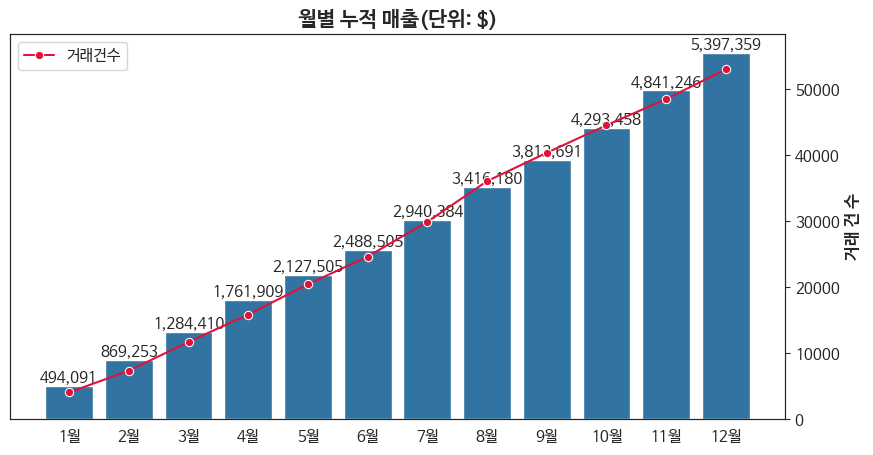

In [9]:
data = onlinesales.groupby(onlinesales['거래날짜'].dt.month).agg({'총 지불금액': 'sum', '거래ID': 'count'}).cumsum()
data.index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

fig, ax1 = plt.subplots(figsize=(10, 5))
# 총 지불금액
sns.barplot(x=data.index, y=data['총 지불금액'], ax=ax1)
# 데이터 라벨 표시
for i, count in enumerate(data['총 지불금액']):
    ax1.text(i, count, f'{count:,.0f}', ha='center', va='bottom')
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.set_xlabel('')

# 거래 건 수
ax2 = ax1.twinx()
sns.lineplot(x=data.index, y=data['거래ID'], ax=ax2, color='crimson', marker='o', label='거래건수')
ax2.set_ylabel('거래 건 수', fontsize=12, fontweight='bold')
ax2.set_ylim(0, data['거래ID'].max() * 1.1)
ax2.legend(loc='upper left')

plt.title('월별 누적 매출(단위: $)', fontsize=15, fontweight='bold')
plt.show()

In [10]:
data = onlinesales.groupby(onlinesales['거래날짜'].dt.month).agg({'총 지불금액': 'sum', '거래ID': 'count'})
data[['이전거래금액', '이전거래건수']] = data.shift(periods=1)
data['거래금액증감'] = data['총 지불금액'] - data['이전거래금액']
data['거래건수증감'] = data['거래ID'] - data['이전거래건수']
data['거래금액증감률'] = data['거래금액증감'] / data['이전거래금액']
data['거래건수증감률'] = data['거래건수증감'] / data['이전거래건수']
data

,총 지불금액,거래ID,이전거래금액,이전거래건수,거래금액증감,거래건수증감,거래금액증감률,거래건수증감률
거래날짜,,,,,,,,
1,494090.54875,4063,NaN,NaN,NaN,NaN,NaN,NaN
2,375162.04730,3284,494090.54875,4063.0,-118928.50145,-779.0,-0.240702,-0.191730
3,415157.79044,4346,375162.04730,3284.0,39995.74314,1062.0,0.106609,0.323386
4,477498.59102,4150,415157.79044,4346.0,62340.80058,-196.0,0.150162,-0.045099
5,365596.02956,4572,477498.59102,4150.0,-111902.56146,422.0,-0.234352,0.101687
6,361000.17429,4193,365596.02956,4572.0,-4595.85527,-379.0,-0.012571,-0.082896
7,451878.40904,5251,361000.17429,4193.0,90878.23475,1058.0,0.251740,0.252325
8,475796.87554,6150,451878.40904,5251.0,23918.46650,899.0,0.052931,0.171205
9,396510.49254,4288,475796.87554,6150.0,-79286.38300,-1862.0,-0.166639,-0.302764


posx and posy should be finite values
posx and posy should be finite values


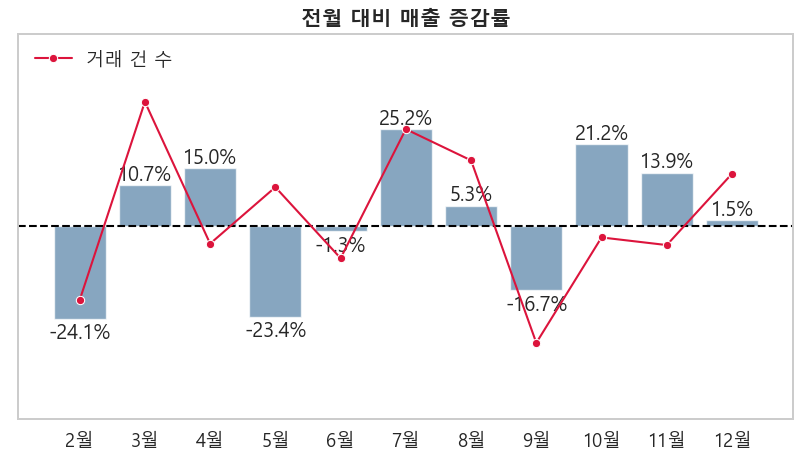

In [36]:
data = onlinesales.groupby(onlinesales['거래날짜'].dt.month).agg({'총 지불금액': 'sum', '거래ID': 'count'})
data[['이전거래금액', '이전거래건수']] = data.shift(periods=1)
data['거래금액증감'] = data['총 지불금액'] - data['이전거래금액']
data['거래건수증감'] = data['거래ID'] - data['이전거래건수']
data['거래금액증감률'] = data['거래금액증감'] / data['이전거래금액']
data['거래건수증감률'] = data['거래건수증감'] / data['이전거래건수']
data.index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

fig, ax1 = plt.subplots(figsize=(10, 5))
# 거래금액증감률
sns.barplot(x=data.index, y=data['거래금액증감률'], ax=ax1, color='steelblue', alpha=0.7)
# 데이터 라벨 표시
for i, count in enumerate(data['거래금액증감률']):
    # 값이 양수인 경우: 막대 위에 라벨 표시
    if count >= 0:
        ax1.text(i, count, f'{count:.1%}', ha='center', va='bottom')
    # 값이 음수인 경우: 막대 아래에 라벨 표시
    else:
        ax1.text(i, count - 0.01, f'{count:.1%}', ha='center', va='top')

ax1.axhline(y=0, color='black', linestyle='--') # 수평선
ax1.set_ylim(-0.5, 0.5)
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.set_xlabel('')

ax2 = ax1.twinx()
# 거래건수증감률
sns.lineplot(x=data.index, y=data['거래건수증감률'], ax=ax2, color='crimson', marker='o', label='거래 건 수')
ax2.set_ylabel('')
ax2.set_yticks([])
ax2.set_ylim(-0.5, 0.5)
ax2.legend(loc='upper left')

plt.title('전월 대비 매출 증감률', fontsize=15, fontweight='bold')
plt.show()

- 2월과 9월엔 매출과 거래 건 수의 감소가 동시에 발생함
- 5월의 경우 거래 건 수는 증가하였지만 매출은 크게 감소

> 요일별

In [12]:
onlinesales.groupby(onlinesales['거래날짜'].dt.day_name()).agg({'총 지불금액': 'sum', '거래ID': 'count'})

,총 지불금액,거래ID
거래날짜,,
Friday,998722.68836,9266
Monday,412681.88924,4464
Saturday,791133.55953,8177
Sunday,813766.51229,8519
Thursday,974511.96144,9000
Tuesday,450233.69110,4611
Wednesday,956308.44438,8887


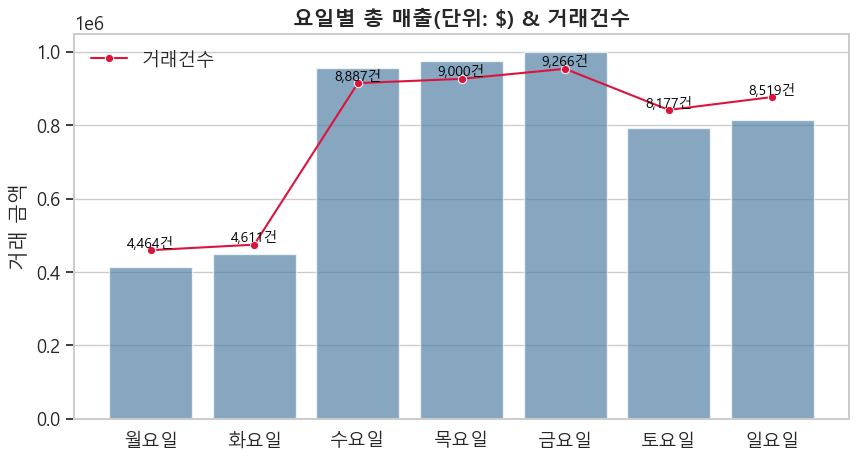

In [48]:
data = onlinesales.groupby(onlinesales['거래날짜'].dt.day_name()).agg({'총 지불금액': 'sum', '거래ID': 'count'})
data = data.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
data.index = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

fig, ax1 = plt.subplots(figsize=(10, 5))
# 총 지불금액
sns.barplot(x=data.index, y=data['총 지불금액'], ax=ax1, color='steelblue', alpha=0.7)
ax1.set_ylabel('거래 금액')
ax1.set_xlabel('')

# 거래 건 수
ax2 = ax1.twinx()
sns.lineplot(x=data.index, y=data['거래ID'], ax=ax2, color='crimson', marker='o', label='거래건수')
# 데이터 레이블 표시
for i, value in enumerate(data['거래ID']):
    ax2.text(i, value, f'{(value):,.0f}건', ha='center', va='bottom', fontsize=10, color='black')
ax2.set_ylabel('')
ax2.set_yticks([])
ax2.set_ylim(0, data['거래ID'].max() * 1.1)
ax2.legend(loc='upper left')

plt.title('요일별 총 매출(단위: $) & 거래건수', fontsize=15, fontweight='bold')
plt.show()

> 월, 요일별 거래금액

In [16]:
onlinesales.groupby([onlinesales['거래날짜'].dt.month, onlinesales['거래날짜'].dt.day_name()])['총 지불금액'].sum().unstack()

거래날짜,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
거래날짜,,,,,,,
1,74108.67188,25158.41259,70058.48433,71322.28528,109360.36863,51112.55916,92969.76688
2,61477.49446,23684.46038,56687.93746,57714.10304,92187.46302,23972.41274,59438.17620
3,82840.44629,31836.77450,60557.81701,65152.15310,63694.72663,35242.62517,75833.24774
4,106657.96413,35753.91867,70589.92479,76952.24893,88281.39603,39614.58784,59648.55063
5,75221.55254,25807.31594,43178.77244,54796.55852,75417.68346,22820.55668,68353.58998
6,60866.26539,24609.25579,63140.37664,63042.83966,51424.79892,29622.22734,68294.41055
7,66295.31450,33620.07710,80179.69652,58432.76634,85391.17779,39425.81984,88533.55695
8,120998.59098,32890.07978,72105.85266,65754.50592,88543.53860,27377.23716,68127.07044
9,81692.08371,39572.38884,54162.91707,75055.94758,61060.63834,27800.22358,57166.29342


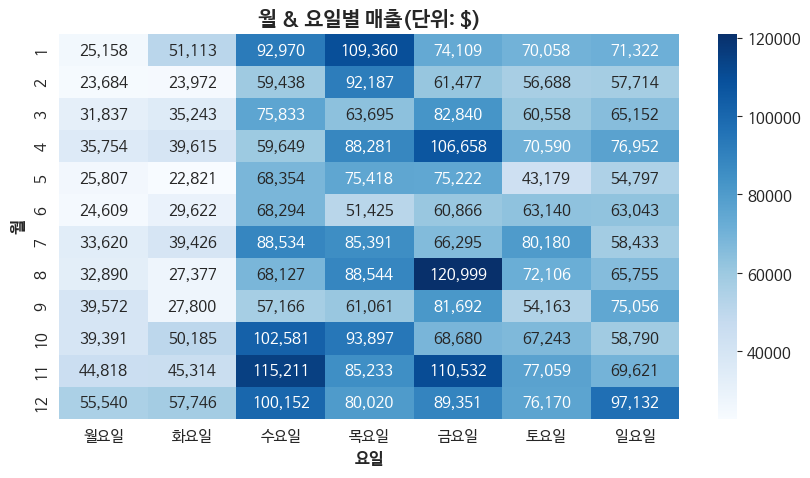

In [17]:
data = onlinesales.groupby([onlinesales['거래날짜'].dt.month, onlinesales['거래날짜'].dt.day_name()])['총 지불금액'].sum().unstack()
data = data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
data.columns = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

plt.figure(figsize=(10, 5))
sns.heatmap(data, annot=True, fmt=',.0f', cmap='Blues')

plt.title('월 & 요일별 매출(단위: $)', fontsize=15, fontweight='bold')
plt.xlabel('요일', fontsize=12, fontweight='bold')
plt.ylabel('월', fontsize=12, fontweight='bold')
plt.show()

- 12월은 전체적으로 준수해 보임
- 공통적으로 월요일, 화요일의 모든 지표가 다른 요일에 비해 매우 낮은 수준으로 보임

### 고객 분포

In [18]:
print(f'고객 수: {customer.고객ID.nunique()} 명')

고객 수: 1468 명


> 가입 기간별 고객 수

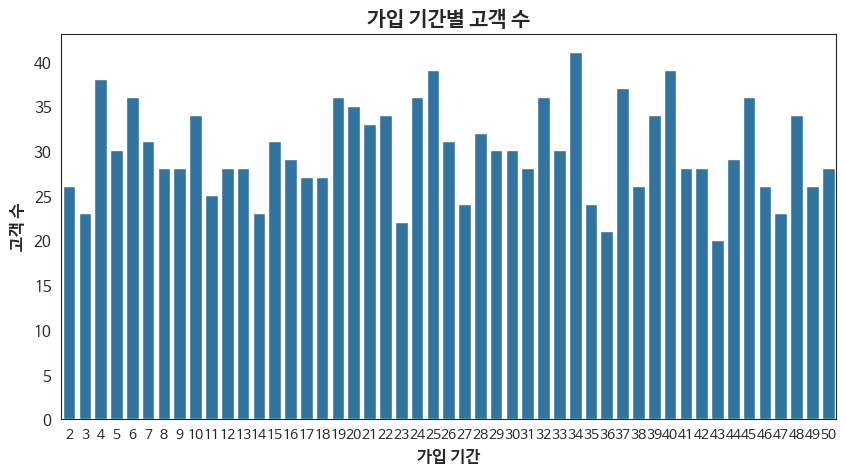

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=customer.가입기간)
plt.title('가입 기간별 고객 수', fontsize=15, fontweight='bold')
plt.xlabel('가입 기간', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.ylabel('고객 수', fontsize=12, fontweight='bold')
plt.show()

- 가입한 지 최소 2달부터 최대 50달까지 고객들이 골고루 분포됨

> 고객 성별 비율

In [ ]:
pd.concat([customer.성별.value_counts(), customer.성별.value_counts(normalize=True).round(2)], axis=1)

,count,proportion
성별,,
여,934,0.64
남,534,0.36


> 지역별 고객 수

In [ ]:
customer.groupby('성별')['고객지역'].value_counts().unstack()

고객지역,California,Chicago,New Jersey,New York,Washington DC
성별,,,,,
남,165,171,52,111,35
여,299,285,97,213,40


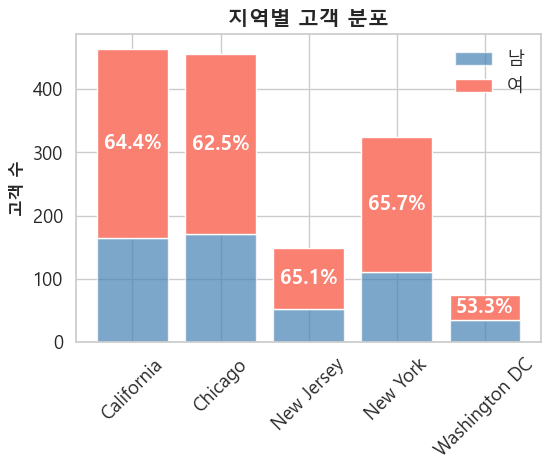

In [69]:
data = customer.groupby('성별')['고객지역'].value_counts().unstack()

plt.figure(figsize=(6, 4))
plt.bar(data.columns, data.loc['남'], label='남', color='steelblue', alpha=0.7)
plt.bar(data.columns, data.loc['여'], bottom=data.loc['남'], label='여', color='salmon')
# 여성 비율 퍼센트 막대 안에 표시
for i, v in enumerate(data.loc['여']):
    plt.text(i, data.loc['남'][i] + v / 2, f'{v / (data.loc["남"][i] + v) * 100:.1f}%', ha='center', va='center', color='white', fontweight='bold')

plt.title('지역별 고객 분포', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('고객 수', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

- 뉴저지와 워싱턴DC에 위치한 고객 수가 비교적 낮게 나타났으며, 남성보다는 여성 고객의 수가 더 많게 나타남

### 카테고리 별 제품 정보

In [ ]:
print(f'제품카테고리 수: {onlinesales.제품카테고리.nunique()} 개')

제품카테고리 수: 20 개


> 카테고리별 제품 수

In [ ]:
onlinesales.groupby('제품카테고리')['제품ID'].nunique()

,제품ID
제품카테고리,
Accessories,7
Android,5
Apparel,923
Backpacks,3
Bags,17
Bottles,2
Drinkware,31
Fun,3
Gift Cards,6


In [ ]:
onlinesales.groupby('제품카테고리')['제품ID'].nunique().sum()

1145

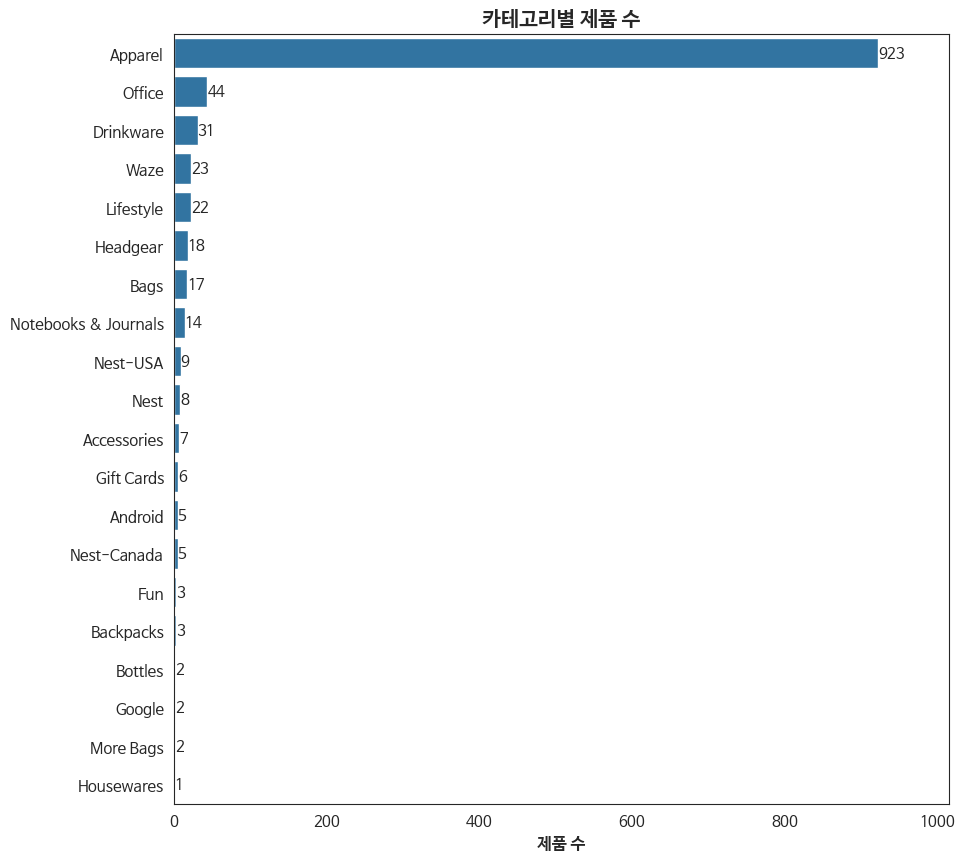

In [ ]:
data = onlinesales.groupby('제품카테고리')['제품ID'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(y=data.index, x=data.values, orient='h')
# 데이터 라벨 표시
for i, count in enumerate(data.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.title('카테고리별 제품 수', fontsize=15, fontweight='bold')
plt.xlabel('제품 수', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.xlim(0, data.max() * 1.1)
plt.show()

- 전체 1145개 고유 제품 중 Apparel(의류)이 923개로 나타남
- 악세서리, 가방 외에 사무용품, 스마트홈 등 생활용품 제품군이 포함되어 있는 것으로 보아 일반적인 의류 쇼핑몰이 아닐 수 있음

> 카테고리별 총 거래 금액 & 주문 수량

In [19]:
onlinesales.groupby('제품카테고리')[['수량', '총 지불금액']].sum()

,수량,총 지불금액
제품카테고리,,
Accessories,1097,1.019929e+04
Android,45,1.116321e+03
Apparel,32438,8.278292e+05
Backpacks,113,1.081288e+04
Bags,15273,1.936266e+05
Bottles,2090,1.017231e+04
Drinkware,30501,2.726220e+05
Fun,834,8.994542e+03
Gift Cards,206,1.944744e+04


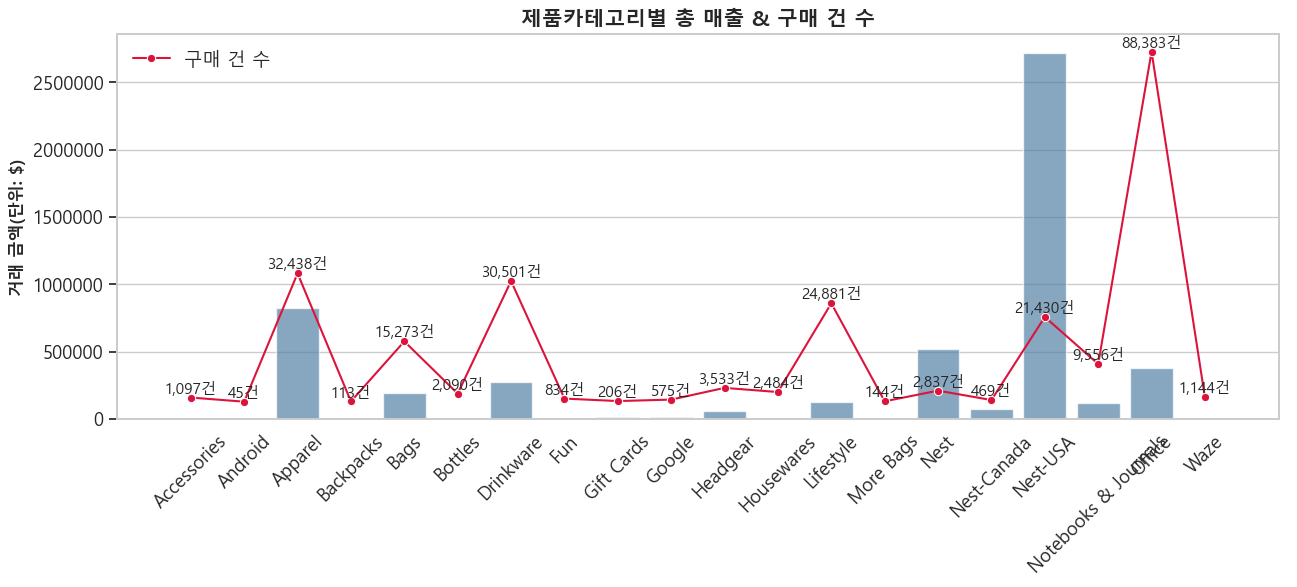

In [55]:
category = onlinesales.groupby('제품카테고리')[['수량', '총 지불금액']].sum()

fig, ax1 = plt.subplots(figsize=(15, 5))
# 총 지불금액
sns.barplot(x=category.index, y=category['총 지불금액'], ax=ax1, color='steelblue', alpha=0.7)
ax1.set_xlabel('')
ax1.set_ylabel('거래 금액(단위: $)', fontsize=12, fontweight='bold')
ax1.ticklabel_format(axis='y', style='plain')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
# 구매 건 수
sns.lineplot(x=category.index, y=category['수량'], ax=ax2, color='crimson', marker='o', label='구매 건 수')
# 데이터 라벨 표시
for i, count in enumerate(category['수량']):
    ax2.text(i, count, f'{count:,}건', ha='center', va='bottom', fontsize=11)

ax2.set_ylabel('')
ax2.set_yticks([])
ax2.legend(loc='upper left')

plt.title('제품카테고리별 총 매출 & 구매 건 수', fontsize=15, fontweight='bold')
plt.show()

- 품목수가 가장 많은 Apparel 보다 Nest-USA 의 거래 금액이 훨씬 높게 나타남 → Nest-USA의 단가가 높을거라 추측됨
- 게다가 거래 건수는 Office 가 가장 많게 나타남

> 카테고리별 제품 가격

In [ ]:
onlinesales.groupby('제품카테고리')['평균금액'].describe().style.background_gradient(subset=['mean', 'std', 'min', '25%', '50%', '75%', 'max'], cmap='Blues', vmin=0).format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
제품카테고리,,,,,,,,
Accessories,234.00,8.21,11.87,2.39,2.44,3.99,5.09,59.99
Android,43.00,15.90,3.26,11.19,13.99,15.99,19.99,20.62
Apparel,18126.00,19.79,15.41,1.59,10.63,15.39,20.75,149.00
Backpacks,89.00,80.05,21.97,38.39,79.99,79.99,99.99,103.15
Bags,1882.00,29.83,35.34,0.99,4.99,12.31,55.99,152.88
Bottles,268.00,3.44,1.03,1.25,2.49,2.99,3.99,8.99
Drinkware,3483.00,10.70,7.62,0.99,2.99,10.39,16.79,35.07
Fun,160.00,6.74,2.08,3.60,4.50,7.19,8.99,9.27
Gift Cards,159.00,111.36,92.72,10.00,25.00,100.00,250.00,254.82


- 'Nest'가 포함된 제품카테고리의 단가가 비교적 높게 나타나 보입니다.
- 일반 'Nest' 의 최솟값이 20.39 → 부속품이거나 이상치일 가능성

> 카테고리별 제품 고유ID 패턴 탐색

In [ ]:
import re
data = onlinesales.groupby('제품카테고리')['제품ID'].unique().reset_index()

# 제품ID별 Product_만 제거 한 후 오름차순으로 정렬
data['제품ID'] = data['제품ID'].apply(lambda x: [re.sub('Product_', '', i) for i in x])
data['제품ID'] = data['제품ID'].apply(lambda x: sorted(x))
data

,제품카테고리,제품ID
0,Accessories,"[0182, 0183, 0856, 0857, 0871, 0903, 1016]"
1,Android,"[0021, 0022, 0023, 0024, 0025]"
2,Apparel,"[0001, 0002, 0003, 0004, 0005, 0006, 0007, 000..."
3,Backpacks,"[0860, 0861, 0863]"
4,Bags,"[0843, 0844, 0845, 0846, 0847, 0848, 0849, 085..."
5,Bottles,"[0177, 1133]"
6,Drinkware,"[0175, 0176, 0178, 0179, 0180, 0181, 0876, 087..."
7,Fun,"[0196, 0950, 1138]"
8,Gift Cards,"[0314, 0909, 0910, 0911, 0912, 0913]"
9,Google,"[0886, 0889]"


In [ ]:
data[data['제품카테고리'] == 'Nest-USA']['제품ID'].values

array([list(['0976', '0977', '0978', '0980', '0981', '0983', '0984', '0985', '0989'])],
      dtype=object)

In [ ]:
data[data['제품카테고리'] == 'Waze']['제품ID'].values

array([list(['0998', '0999', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1017', '1018', '1019', '1020', '1021'])],
      dtype=object)

In [ ]:
# 특정 제품ID가 포함된 카테고리찾기
num = '1016'

data[data['제품ID'].apply(lambda x: num in x)]

,제품카테고리,제품ID
0,Accessories,"[0182, 0183, 0856, 0857, 0871, 0903, 1016]"


- Nest 제품군(Nset, Nset-USA, Nest-Canada): 0976 ~ 0997
- Waze 제품군: 0998 ~ 1021, 중간에 1016 의 경우 Accessories 카테고리에 포함되어있는 것을 확인
- 순서가 있는 것으로 보이지만 아닌 경우도 포함하고 있어 명확하게 일정한 패턴이 있다고 보긴 어려움

### 마케팅 정보

> 마케팅 비용 대비 매출 비중

In [6]:
# 일별 거래 금액
date_sales = onlinesales.groupby('거래날짜')[['총 금액', '할인적용금액', '총 지불금액']].sum()
date_sales.index.name = '날짜'

# 일 평균 적용 할인율
date_discount = onlinesales[onlinesales['쿠폰상태'] == 'Used'].groupby('거래날짜')['할인율'].mean()
date_discount.index.name = '날짜'

marketing = pd.merge(marketing, date_sales, how='left', left_on='날짜', right_index=True)
marketing = pd.merge(marketing, date_discount, how='left', left_on='날짜', right_index=True)

display(marketing.head())

,날짜,오프라인비용,온라인비용,월,총 금액,할인적용금액,총 지불금액,할인율
0,2019-01-01,4500,2424.50,1,7380.49,7139.806,9039.42048,9.687500
1,2019-01-02,4500,3480.36,1,13438.47,13036.163,15269.39436,9.687500
2,2019-01-03,4500,1576.38,1,23834.21,23043.833,29145.65155,9.855072
3,2019-01-04,4500,2928.55,1,16603.41,16144.462,19500.23722,9.814815
4,2019-01-05,4500,4055.30,1,17373.19,16877.061,21260.25480,9.830508


- 단순 ROI: (판매 - 마케팅 비용)/마케팅 비용

In [15]:
data = marketing.groupby('월')['오프라인비용', '온라인비용', '총 지불금액'].sum()
data['마케팅비용'] = data['오프라인비용'] + data['온라인비용']
data['ROI'] = (data['총 지불금액']-data['마케팅비용']).div(data['마케팅비용'])
display(data)

,오프라인비용,온라인비용,총 지불금액,마케팅비용,ROI
월,,,,,
1,96600,58328.95,494090.54875,154928.95,2.189143
2,81300,55807.92,375162.04730,137107.92,1.736254
3,73500,48750.09,415157.79044,122250.09,2.395971
4,96000,61026.83,477498.59102,157026.83,2.040873
5,65500,52759.64,365596.02956,118259.64,2.091469
6,80500,53818.14,361000.17429,134318.14,1.687650
7,67500,52717.85,451878.40904,120217.85,2.758830
8,85500,57404.15,475796.87554,142904.15,2.329483
9,83000,52514.54,396510.49254,135514.54,1.925963


> 쿠폰코드 정보

In [22]:
discount.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
print(f'쿠폰코드 종류: {discount.쿠폰코드.nunique()} 개')

쿠폰코드 종류: 48 개


In [ ]:
discount.쿠폰코드.value_counts().sort_index()

,count
쿠폰코드,
ACC10,4
ACC20,4
ACC30,4
AIO10,4
AIO20,4
AIO30,4
AND10,4
AND20,4
AND30,4


In [ ]:
discount.제품카테고리.value_counts()

,count
제품카테고리,
Apparel,12
Waze,12
Notebooks & Journals,12
Gift Cards,12
Accessories,12
Housewares,12
Nest-Canada,12
Bottles,12
Nest,12


- 17개 제품카테고리에만 쿠폰코드를 통한 할인이 적용됨

> 마케팅 비용 추이

,온라인비용,오프라인비용,총 비용
1월,58328.95,96600,154928.95
2월,55807.92,81300,137107.92
3월,48750.09,73500,122250.09
4월,61026.83,96000,157026.83
5월,52759.64,65500,118259.64
6월,53818.14,80500,134318.14
7월,52717.85,67500,120217.85
8월,57404.15,85500,142904.15
9월,52514.54,83000,135514.54
10월,57724.65,93500,151224.65


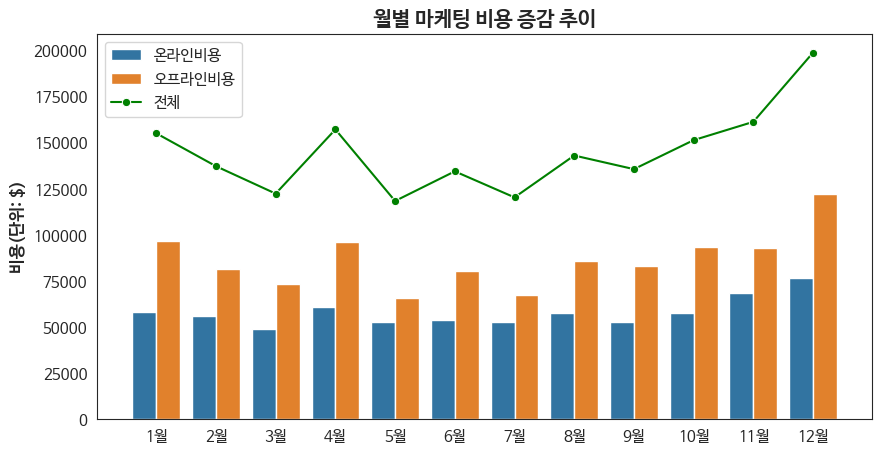

In [ ]:
data = marketing.groupby('월').agg({'온라인비용': 'sum', '오프라인비용': 'sum'})
data.index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
data['총 비용'] = data['온라인비용'] + data['오프라인비용']
melt_data = data.reset_index(names='월').melt(id_vars='월', value_vars=['온라인비용', '오프라인비용'], var_name='비용구분', value_name='비용')
display(data)

plt.figure(figsize=(10, 5))
sns.barplot(melt_data, x='월', y='비용', hue='비용구분')
sns.lineplot(data, x=data.index, y='총 비용', color='green', label='전체', marker='o')

plt.title('월별 마케팅 비용 증감 추이', fontsize=15, fontweight='bold')
plt.ylabel('비용(단위: $)', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.legend()
plt.show()

- 온라인, 오프라인 마케팅 비용은 비슷한 추이로 보이지만, 전체적으로 온라인 대비 오프라인 비용이 더 높게 설정되어 있습니다.
- 4월엔 마케팅 비용이 급상승 했다가 하락한 것으로 보이며, 이후 연말까지 점진적으로 상승하는 모습입니다.

> 매출 대비 마케팅 비용

In [20]:
marketing_rate = marketing.groupby('월').agg({'총 지불금액': 'sum', '온라인비용': 'sum', '오프라인비용': 'sum'})
marketing_rate['마케팅비용비율'] = (marketing_rate['온라인비용'] + marketing_rate['오프라인비용']) / marketing_rate['총 지불금액']
marketing_rate

,총 지불금액,온라인비용,오프라인비용,마케팅비용비율
월,,,,
1,494090.54875,58328.95,96600,0.313564
2,375162.04730,55807.92,81300,0.365463
3,415157.79044,48750.09,73500,0.294467
4,477498.59102,61026.83,96000,0.328853
5,365596.02956,52759.64,65500,0.323471
6,361000.17429,53818.14,80500,0.372072
7,451878.40904,52717.85,67500,0.266040
8,475796.87554,57404.15,85500,0.300347
9,396510.49254,52514.54,83000,0.341768


In [23]:
marketing_rate['마케팅비용비율'].mean()

0.32266474017758867

- 매출 대비 평균 마케팅 비용 비율은 약 32%

> 월 평균 할인율

In [ ]:
marketing.groupby('월')['할인율'].mean()

,할인율
월,
1,9.901384
2,19.776247
3,29.640088
4,9.892955
5,19.780927
6,29.778389
7,9.931296
8,19.825972
9,29.953321


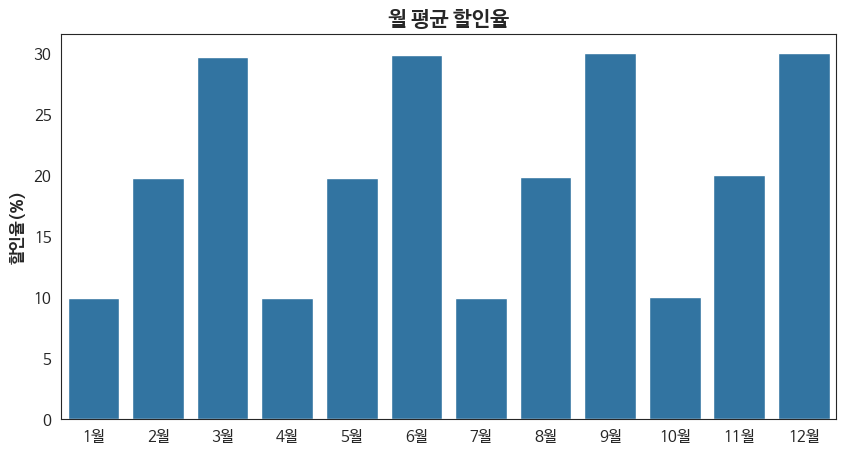

In [ ]:
data = marketing.groupby('월')['할인율'].mean()
data.index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

plt.figure(figsize=(10, 5))
sns.barplot(x=data.index, y=data.values)

plt.title('월 평균 할인율', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('할인율(%)', fontsize=12, fontweight='bold')
plt.show()

- 할인이 적용된 거래에 대해서 각 분기에 걸쳐 점진적으로 상승을 반복하는 똑같은 패턴으로 월 평균 할인율이 나타나고 있습니다.

> 제품카테고리별 쿠폰 적용 여부

In [ ]:
onlinesales.groupby('제품카테고리')['쿠폰상태'].value_counts().unstack()

쿠폰상태,Clicked,Not Used,Used
제품카테고리,,,
Accessories,125,32,77
Android,23,10,10
Apparel,9223,2747,6156
Backpacks,47,15,27
Bags,972,285,625
Bottles,138,48,82
Drinkware,1752,570,1161
Fun,83,25,52
Gift Cards,81,22,56


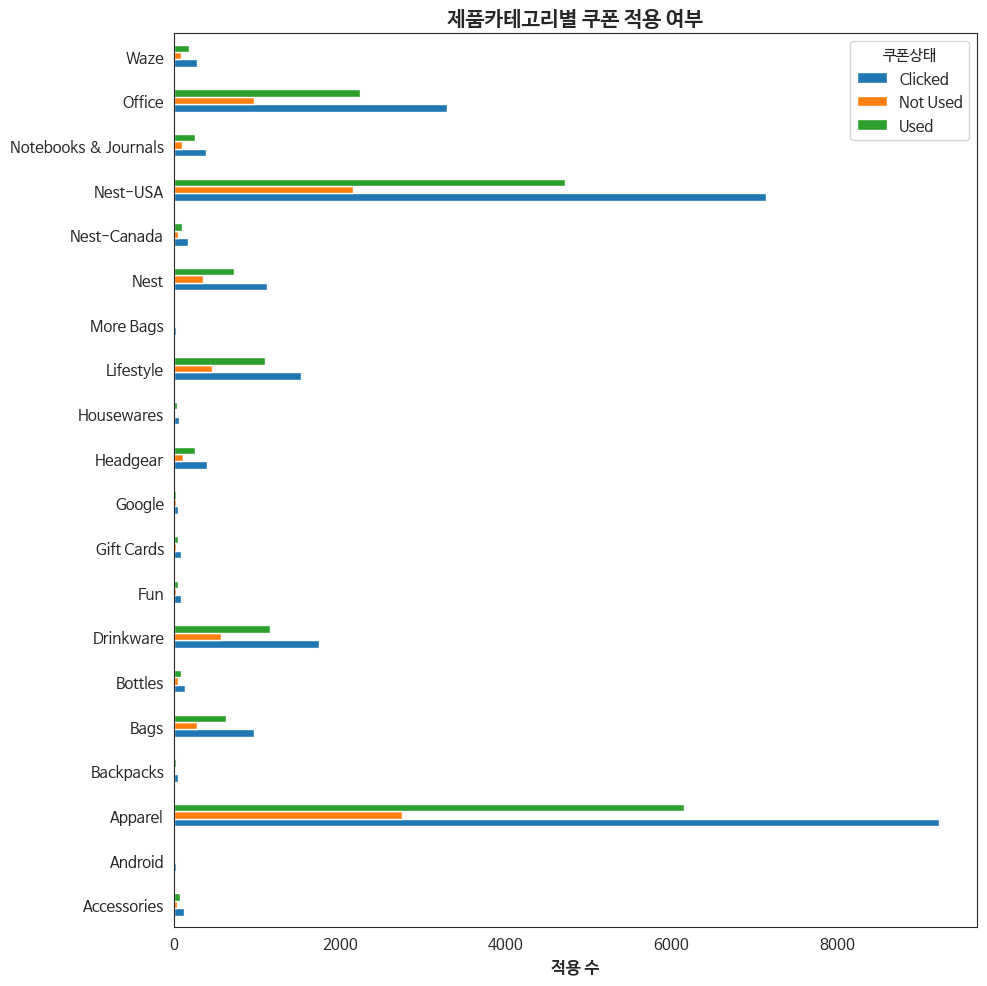

In [ ]:
data = onlinesales.groupby('제품카테고리')['쿠폰상태'].value_counts().unstack()

data.plot(kind='barh', figsize=(10, 10))
plt.title('제품카테고리별 쿠폰 적용 여부', fontsize=15, fontweight='bold')
plt.xlabel('적용 수', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.legend(title='쿠폰상태', loc='upper right')
plt.tight_layout()
plt.show()

## ▶ Sales 지표 개선을 위한 비교 분석

- 재품카테고리별 품목 수의 차이가 심하며, 제품 수가 매출로 전환이 안됨
- 구매량에 따른 제품별 매출이 제각각
- **월요일, 화요일의 지표가 다른 요일 대비 상당히 낮게 나타남**
  - 왜 이렇게 나타났는지?
  - 다른 요일과 비교했을 때 어떤 차이점이 있는지? - 구매 경향
  - 구매 활동을 침체시키는 요인이 무엇인지?
  - 고객 RFM 기반 Segment 를 정의하고 그룹별 Segment 분포 비교

→ 월요일, 화요일 지표 개선은 곧 높은 수익성을 창출해낼 수 있음

- Group 1: 월요일, 화요일
- Group 2: 수요일 ~ 일요일

In [32]:
group = onlinesales.copy()
group['요일'] = onlinesales.거래날짜.dt.day_name()

group1 = group[group['요일'].isin(['Monday', 'Tuesday'])]
group2 = group[group['요일'].isin(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])]

print(f'group1: {len(group1):,}')
print(f'group2: {len(group2):,}')

group1: 9,075
group2: 43,849


In [33]:
print(f'group 1 고객 수: {group1.고객ID.nunique()} 명')
print(f'group 2 고객 수: {group2.고객ID.nunique():,} 명\n')
print(f'group 1 주문 건 수: {group1.거래ID.nunique():,} 건')
print(f'group 2 주문 건 수: {group2.거래ID.nunique():,} 건')

group 1 고객 수: 448 명
group 2 고객 수: 1,329 명

group 1 주문 건 수: 4,445 건
group 2 주문 건 수: 20,616 건


### 구매 선호 제품카테고리

> 제품카테고리별

In [34]:
group1.groupby('제품카테고리')['총 지불금액'].mean()

,총 지불금액
제품카테고리,
Accessories,19.615628
Android,31.386550
Apparel,32.412992
Backpacks,104.829455
Bags,72.979210
Bottles,20.442396
Drinkware,40.386853
Fun,25.196400
Gift Cards,100.459050


In [35]:
group2.groupby('제품카테고리')['총 지불금액'].mean()

,총 지불금액
제품카테고리,
Accessories,47.384108
Android,25.081135
Apparel,48.317116
Backpacks,126.964642
Bags,108.044469
Bottles,41.029030
Drinkware,83.835834
Fun,63.970758
Gift Cards,124.420807


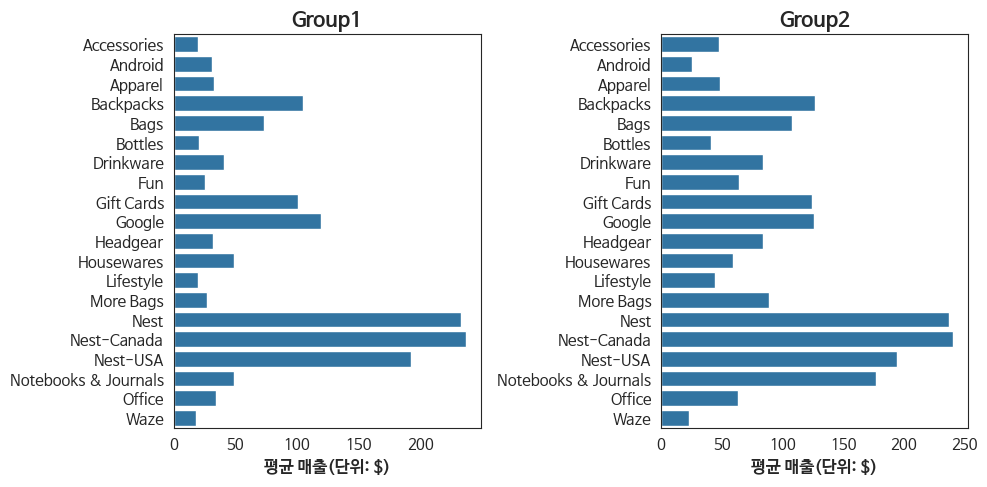

In [36]:
group1_data = group1.groupby('제품카테고리')['총 지불금액'].mean()
group2_data = group2.groupby('제품카테고리')['총 지불금액'].mean()

plt.figure(figsize = (10, 5))
# Group1
plt.subplot(1, 2, 1)
sns.barplot(y=group1_data.index, x=group1_data.values, orient='h')
plt.title('Group1', fontsize=15, fontweight='bold')
plt.xlabel('평균 매출(단위: $)', fontsize=12, fontweight='bold')
plt.ylabel('')

# Group2
plt.subplot(1, 2, 2)
sns.barplot(y=group2_data.index, x=group2_data.values, orient='h')
plt.title('Group2', fontsize=15, fontweight='bold')
plt.xlabel('평균 매출(단위: $)', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

**구매 선호 제품 카테고리**
- 그룹 간 발생한 매출의 차이가 큰 부분을 감안하여 합계가 아닌 평균으로 비교
- Group2(수요일 ~ 일요일) 의 전체적인 지표가 높게 나타나 거래가 비교적 활발한 경향이 있음
- 특히, Notebooks & Journals 의 평균 매출 차이가 심함

### 일회성 구매 고객 비율

In [ ]:
data = group1.groupby('고객ID')['거래ID'].nunique().to_frame('주문 수')
pd.concat([data['주문 수'].value_counts(), data['주문 수'].value_counts(normalize=True).round(2)], axis=1).sort_index().head(10)

,count,proportion
주문 수,,
1,60,0.13
2,41,0.09
3,38,0.08
4,35,0.08
5,39,0.09
6,20,0.04
7,20,0.04
8,16,0.04
9,16,0.04


In [ ]:
data = group2.groupby('고객ID')['거래ID'].nunique().to_frame('주문 수')
pd.concat([data['주문 수'].value_counts(), data['주문 수'].value_counts(normalize=True).round(2)], axis=1).sort_index().head(10)

,count,proportion
주문 수,,
1,133,0.10
2,69,0.05
3,68,0.05
4,59,0.04
5,69,0.05
6,56,0.04
7,64,0.05
8,71,0.05
9,48,0.04


<ipython-input-205-642a6c4a20b9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group1_data['주문 수'], y=group1_data['count'], palette=colors1)
<ipython-input-205-642a6c4a20b9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group2_data['주문 수'], y=group2_data['count'], palette=colors2)


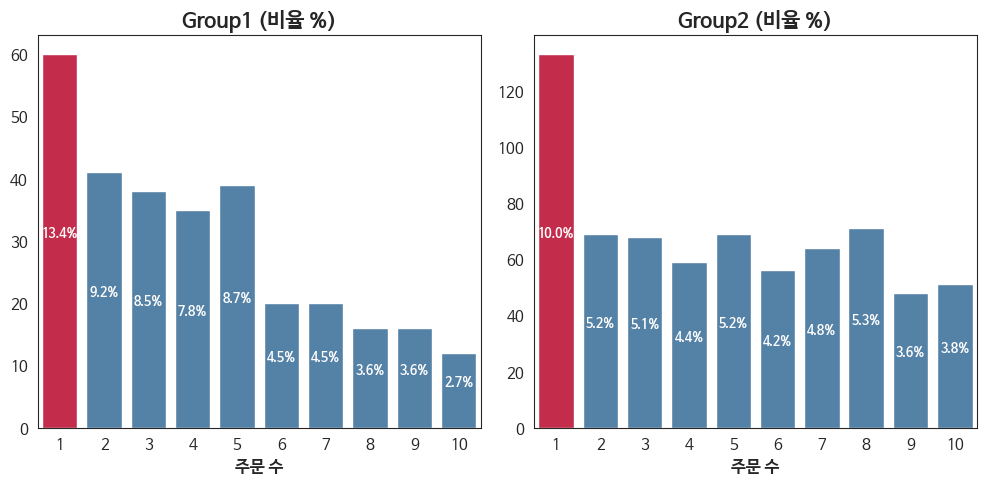

In [ ]:
group1_data = group1.groupby('고객ID')['거래ID'].nunique().to_frame('주문 수')
group1_data = pd.concat([group1_data['주문 수'].value_counts(), group1_data['주문 수'].value_counts(normalize=True).round(3)*100], axis=1).sort_index().head(10).reset_index()
group2_data = group2.groupby('고객ID')['거래ID'].nunique().to_frame('주문 수')
group2_data = pd.concat([group2_data['주문 수'].value_counts(), group2_data['주문 수'].value_counts(normalize=True).round(3)*100], axis=1).sort_index().head(10).reset_index()

colors1 = ['crimson' if row['주문 수'] == 1 else 'steelblue' for _, row in group1_data.iterrows()]
colors2 = ['crimson' if row['주문 수'] == 1 else 'steelblue' for _, row in group2_data.iterrows()]

plt.figure(figsize=(10, 5))
# Group1
plt.subplot(1, 2, 1)
sns.barplot(x=group1_data['주문 수'], y=group1_data['count'], palette=colors1)
plt.title('Group1 (비율 %)', fontsize=15, fontweight='bold')
plt.xlabel('주문 수', fontsize=12, fontweight='bold')
plt.ylabel('')
# 퍼센트 표시
for i, row in group1_data.iterrows():
    plt.text(i, row['count']/2, f"{row['proportion']:.1f}%", ha='center', va='bottom', fontsize=9, color='white', fontweight='bold')
# Group2
plt.subplot(1, 2, 2)
sns.barplot(x=group2_data['주문 수'], y=group2_data['count'], palette=colors2)
plt.title('Group2 (비율 %)', fontsize=15, fontweight='bold')
plt.xlabel('주문 수', fontsize=12, fontweight='bold')
plt.ylabel('')
# 퍼센트 표시
for i, row in group2_data.iterrows():
    plt.text(i, row['count']/2, f"{row['proportion']:.1f}%", ha='center', va='bottom', fontsize=9, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

**일회성 구매 고객 비율**
- Group 1(월요일, 화요일) 의 주문 수가 적은(5회 이하) 고객의 비율이 더 높게 나타남
- 특히, 한 번만 구매한 고객의 비율이 Group 2(수요일 ~ 일요일) 대비 약 3.4% 더 높음